In [1699]:
%load_ext autoreload
%autoreload 2

import numpy as np
import numba as nb
from scipy import stats

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1700]:
from scipy.optimize import minimize

In [1701]:
np.set_printoptions(suppress=True, precision=6)

In [1702]:
from breakdown_uncertainty_me import SimpleBreakdownModelClass

In [1703]:
model = SimpleBreakdownModelClass(par={'r':0.02,'beta':0.98,'Nm':10,'rho':11,'gamma_max':0.008,'gamma_min':0.0178,'tau':5})

In [1704]:
par = model.par
sol = model.sol
sim = model.sim

In [1705]:
%time model.solve()

48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
CPU times: user 13min 19s, sys: 8.82 s, total: 13min 28s
Wall time: 14min 13s


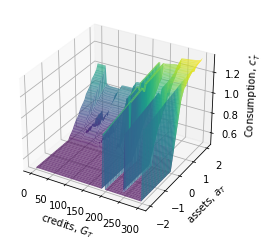

In [1706]:
# last period
a_mesh, G_mesh = np.meshgrid(par.a_grid[:],par.G_grid,indexing='ij')

t = par.T-49
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(G_mesh, a_mesh, sol.c[t,0,:,:],rstride=1,cstride=1,cmap='viridis', edgecolor='none',alpha=0.75);
ax.set(xlabel='credits, $G_{T}$',ylabel='assets, $a_T$',zlabel='Consumption, $c_{T}^{\star}$');

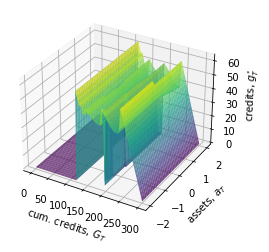

In [1707]:
t = par.T-46

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(G_mesh, a_mesh, sol.g[t,1,:,:],rstride=1,cstride=1,cmap='viridis', edgecolor='none',alpha=0.75);
ax.set(xlabel='cum. credits, $G_{T}$',ylabel='assets, $a_T$',zlabel='credits, $g_{T}^{\star}$');

In [1708]:
print(sol.c_s[par.T-5,0,:,29])

[-1.       -1.       -1.       -1.       -1.       -1.       -1.
 -1.       -1.       -1.       -1.       -1.       -1.       -1.
 -1.       -1.       -1.       -1.       -1.       -1.        0.612046
  0.711981  0.811965  0.912033  0.976873  1.039835  1.058164  1.093712
  1.139426  1.161625  1.182157  1.216271  1.247213  1.266639  1.278947
  1.303552  1.328057  1.353801  1.373897  1.385838  1.407356]


In [1709]:
print(sol.g[par.T-49,0,0,:])

[48.413361 47.908356 47.335419 46.501282 45.646545 45.       44.343658
 46.481873 47.150482 47.159363 46.839294 46.398102 45.908203 45.384064
 45.       44.438599 44.036316 43.565186 43.25473  42.944275 42.601135
 48.042206 48.       47.913116 47.472748 46.945129 46.297119 45.582367
 45.       44.562653 44.104065 43.451294 42.81839  42.177063 41.892975
 41.345123 40.825287 48.       48.       47.588745 47.022125 46.135986
 45.312653 44.793091 44.205597 43.364685 42.526337 42.       41.463776
 41.012878 39.       50.637634 49.665161 48.643707 47.853149 47.068268
 45.713562 45.       44.307861 43.157684 42.08551  41.661621 41.098572
 40.399475  0.        0.       52.103485 51.       49.374664 48.
 46.705353 45.210114 44.307861 42.530914 41.892975 41.142883 40.276611
 39.80896  39.5896   39.707703 60.       57.00001  54.00001  51.00001
 48.00001  45.00001  42.00001  39.00001  36.00001  33.00001  30.00001
 27.00001  24.00001  21.00001  18.00001  15.00001  12.00001   9.00001
  6.00001   3.0

In [1710]:
sol.V_s[par.T-9,0,2,0]
sol.V_w[par.T-9,0,0]

-2000000.0

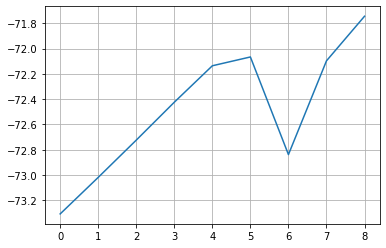

In [1711]:
y_ = [model.value_of_choice_s(2.0, 80.0, 0, 1.0, 220, t) for t in range(9)]
fig, ax = plt.subplots()
ax.grid()
plt.xticks(range(10))
ax.plot(y_)

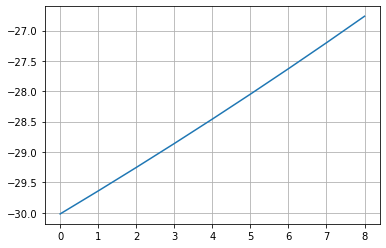

In [1712]:
z_ = [model.value_of_choice_w(2.0,0, 2.0, t) for t in range(9)]
fig, ax = plt.subplots()
ax.grid()
plt.xticks(range(10))
ax.plot(z_)

In [1713]:
model.simulate()

In [1714]:
# cb_counter = 0

# def callbackF(x, y, z):
#     global cb_counter
#     cb_counter += 1
#     print(cb_counter)
#     print("rho: %a, gamma_max: %a, gamma_min: %a" % (x, y, z))

# def pis(x,y,z):
#     callbackF(x,y,z)
    
#     model = SimpleBreakdownModelClass(par={'r':0.02,'beta':0.98,'Nm':10,'rho':x,'gamma_max':y,'gamma_min':z})
#     model.solve()
#     model.simulate()


#     helper = np.array([7,6,6,5,5,5,5,5,5,5])
#     ret = np.zeros(10)
#     step = np.zeros(10)
#     for i in range(10):
#         model_a = model.copy()

#         model_a.sim.m_init[:] = i
#         model_a.sim.a_init[:] = 0.0
#         model_a.sim.e_init[:] = 0
#         model_a.simulate()

#         listen = np.mean(model_a.sim.g,axis=0)
#         listen = np.sum(listen>0.001)
#         print("Type %a = %a " % (i, listen), end = "")
#         ret[i] = listen

#         step[i] = (listen - helper[i])**2

#     print("-----------------")
#     return np.sum(step)

In [1715]:
# obj = lambda x: pis(x[0],x[1],x[2])

# res = minimize(obj,[7.35,0.0105,0.0162], method='SLSQP', callback=callbackF, options={'disp': True},constraints=({'type': 'ineq', 'fun': lambda x: 1 if x[1] < x[2] else 0}))

# print(res.x[0])

In [1716]:
model_a = model.copy()

model_a.sim.m_init[:] = 1
model_a.sim.a_init[:] = 0.0
model_a.sim.e_init[:] = 0
model_a.simulate()

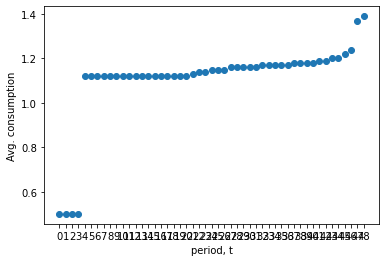

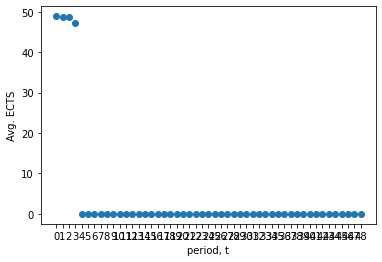

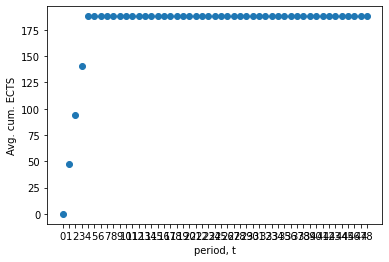

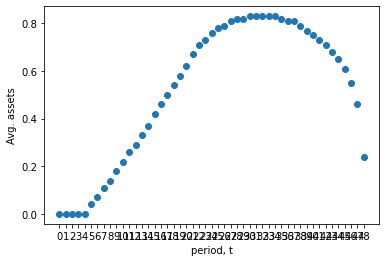

In [1717]:
#Simulation graphs
fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(model_a.sim.c,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. consumption',xticks=range(par.simT));

fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(model_a.sim.g,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. ECTS',xticks=range(par.simT));

fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(model_a.sim.G,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. cum. ECTS',xticks=range(par.simT));

fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(model_a.sim.a,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. assets',xticks=range(par.simT));

In [1718]:
asset_sim = model_a.sim.a
asset_sim[2]

array([ 0.      , -0.      , -0.      , -0.      , -0.      ,  0.081678,
        0.044659,  0.145768,  0.067678,  0.195661,  0.414188,  0.463759,
        0.415863,  0.333874,  0.311429,  0.089007,  0.041023,  0.011801,
        0.10748 ,  0.288413,  0.268227,  0.396498,  0.385778,  0.310981,
        0.376962,  0.433219,  0.607529,  0.586133,  0.864538,  0.799093,
        0.779884,  0.887529,  0.625236,  0.681779,  0.766441,  0.641307,
        0.656687,  0.716624,  0.805232,  0.761294,  0.821977,  0.853201,
        0.933949,  0.854788,  0.725844,  0.713898,  0.616275,  0.463121,
        0.269912])

In [1719]:
cons_sim = model_a.sim.c
#cons_sim[6]

np.mean(model_a.sim.c,axis=0)

array([0.5     , 0.5     , 0.5     , 0.5     , 1.117934, 1.117844,
       1.1177  , 1.117928, 1.117821, 1.11785 , 1.118114, 1.118209,
       1.117629, 1.11809 , 1.118137, 1.119018, 1.1194  , 1.119307,
       1.120173, 1.120775, 1.121766, 1.125053, 1.136539, 1.142164,
       1.147517, 1.150767, 1.153741, 1.156915, 1.15942 , 1.160711,
       1.162716, 1.164847, 1.16716 , 1.168554, 1.170271, 1.171897,
       1.17396 , 1.177889, 1.17923 , 1.18066 , 1.184008, 1.186975,
       1.191429, 1.19633 , 1.204259, 1.21942 , 1.238044, 1.372366,
       1.394178])

In [1720]:
cc_sim = model_a.sim.G
cc_sim[2,par.T-1]

for i in range(100):
    print(cc_sim[i,par.T-1])

190.20977345637658
187.2468322807221
186.99876663363239
187.16616873871686
187.01625971971578
187.1296056518268
186.55070157229932
186.59818798521775
186.58392435455755
190.33161480143747
184.2182788782902
187.5325092907463
186.51765976993204
190.20977345637658
186.5447617859276
188.69302858773003
186.54734098602842
186.46363062936553
190.00710992772588
188.45665686623303
186.38453516176196
190.20977345637658
186.70462811614834
190.31922610565772
186.51582637769567
189.72282214716626
187.6359799717396
186.56936475487055
187.1933428894926
190.3594697988634
186.88212865757384
186.84104142667704
190.33810178330344
187.13100130579443
186.97165223468943
187.05007718546142
186.7237804832646
189.22115083470075
187.74511620630003
186.46812168802273
190.20977345637658
188.67309616747292
186.5645427998719
186.4879059406581
186.86438935944224
190.20977345637658
186.51151827643963
186.44028227355673
187.04526106193745
188.18898727037677
190.27905974276007
190.20977345637658
187.1538333497897
186.7

In [1721]:
credit_sim = model_a.sim.g
credit_sim[2]

array([48.867798, 48.548758, 48.765616, 49.753832,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ])

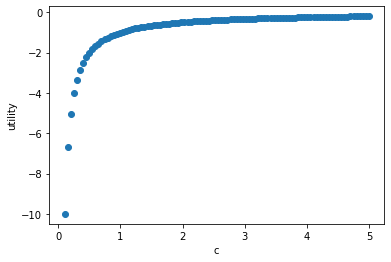

In [1722]:
liste = []
liste_2 = []
g_list = []
c_list = []

for g in np.linspace(0,300,num=300):
    hm = model.util_s(1.0,g,0,29)
    liste.append(hm)
    g_list.append(g)

for c in np.linspace(0.1,5,num=100):
    hm = model.util_s(c, 0, 0, 29)
    liste_2.append(hm)
    c_list.append(c)

fig, ax = plt.subplots()
ax.scatter(c_list,liste_2)
ax.set(xlabel='c',ylabel='utility');

In [1723]:
import math

beta = 0.1*np.sqrt(6)/math.pi

seed=69
rng = np.random.default_rng(seed=seed)


sim.xi = rng.gumbel(loc=0.0, scale=beta, size=10)
sim.xi

array([ 0.011003,  0.022603, -0.05413 , -0.022066,  0.033903, -0.041217,
        0.01871 ,  0.043118,  0.371854, -0.009851])

In [1724]:
# Parameters
h1 = 0.1*np.sqrt(6)/math.pi  # Scale parameter
#mu = 0.0

h2 = -h1 * np.euler_gamma  # Location parameter to center the distribution around zero

# Generate Gumbel-distributed preference shocks centered around zero
preference_shocks = rng.gumbel(h2, h1, size=1000000)

# Calculate the mean (expected value) of the preference shocks
mean_preference_shock = np.mean(preference_shocks)
print("Mean preference shock:", mean_preference_shock)

print(preference_shocks)

Mean preference shock: 8.767314582737433e-05
[-0.078835 -0.06076  -0.137456 ...  0.03517  -0.034345  0.118217]


In [1725]:
loc, scale = 1, 0.1
rv = stats.truncnorm(-1, 0, loc=loc, scale=scale)
r = rv.rvs(size=1000)

In [1726]:
print(r)

[0.925838 0.962382 0.967192 0.950806 0.91758  0.976762 0.952828 0.940371
 0.975007 0.980838 0.926219 0.936077 0.962274 0.944049 0.996413 0.98086
 0.996345 0.96999  0.970384 0.925855 0.906917 0.920841 0.911209 0.921539
 0.946099 0.944642 0.949457 0.981068 0.945326 0.96872  0.996814 0.95979
 0.957347 0.906036 0.938057 0.960388 0.947357 0.927028 0.968803 0.997443
 0.995189 0.984266 0.991146 0.990092 0.965773 0.938584 0.90722  0.930257
 0.920243 0.964692 0.923626 0.953497 0.974834 0.937641 0.904257 0.959762
 0.952247 0.960844 0.976462 0.95682  0.95505  0.904616 0.928897 0.96442
 0.954895 0.974514 0.959286 0.973926 0.949739 0.946998 0.968431 0.926488
 0.929736 0.980002 0.940335 0.935056 0.934828 0.973311 0.959755 0.959856
 0.921082 0.925077 0.931844 0.938648 0.95615  0.931217 0.916648 0.980683
 0.992662 0.915843 0.949885 0.987752 0.984702 0.98634  0.974485 0.925625
 0.993616 0.921281 0.967164 0.998537 0.95725  0.949798 0.918133 0.996612
 0.926611 0.99853  0.955676 0.95973  0.972857 0.912956

In [1727]:
from consav.quadrature import log_normal_gauss_hermite


par.xi_grid,par.xi_weight = log_normal_gauss_hermite(0.1,10,mu=1.0)

In [1728]:

for i in range(10):
    if par.xi_grid[i]>1.0:
        par.xi_grid[i] = 1.0

par.xi_grid

array([0.612047, 0.69546 , 0.776132, 0.859333, 0.947912, 1.      ,
       1.      , 1.      , 1.      , 1.      ])

In [1729]:
par.xi_weight

array([0.000004, 0.000758, 0.019112, 0.135484, 0.344642, 0.344642,
       0.135484, 0.019112, 0.000758, 0.000004])

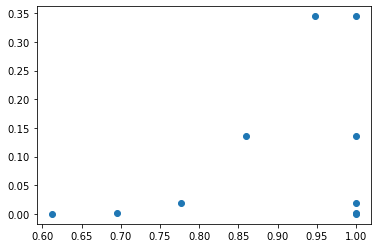

In [1730]:
fig, ax = plt.subplots()
ax.scatter(par.xi_grid,par.xi_weight)
ax.set(xlabel='',ylabel='');

In [1731]:
shape = (par.simN, par.simT)  

sim.xi = np.exp(par.sigma_s*rng.normal(size=shape) - 0.5*par.sigma_s**2)

  

for i in range(par.simN):
    for t in range(par.simT):
        if sim.xi[i,t]>1.0:
            sim.xi[i,t] = 1.0

sim.xi

array([[1.      , 0.970862, 1.      , ..., 0.932499, 0.960857, 1.      ],
       [0.988406, 1.      , 0.987712, ..., 1.      , 1.      , 0.964833],
       [0.953003, 1.      , 0.843424, ..., 1.      , 0.964972, 0.974401],
       ...,
       [0.871879, 1.      , 0.94414 , ..., 1.      , 1.      , 1.      ],
       [0.813058, 0.947842, 0.86037 , ..., 1.      , 0.793786, 0.972387],
       [0.946311, 0.935871, 0.949197, ..., 1.      , 0.904459, 1.      ]])